<a href="https://colab.research.google.com/github/SrishBansal/colaab/blob/colab/2020_11_28_SrishBansal_CapstoneProject7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7: Bengaluru House Prices - Data Cleaning


---

### Context

A techie residing in Mumbai who is a data scientist got an excellent job opportunity from one of his dream company in Bengaluru. Now, he wants to shift to Bengaluru soon and decides to buy a home in the city.
The lack of trust in property developers in the city resulted in a drop of 7% in the housing units sales across India in 2017. The property prices in Bengaluru fell by almost 5% in the second half of 2017, said a study published by a property consultancy firm called Knight Frank. Here's the link to the news article:

[Residential real estate prices drop 3% in big cities
](https://www.businesstoday.in/sectors/infra/residential-real-estate-prices-property-drop-3-per-cent-realty/story/267752.html)

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metro cities, there are others to be considered for the Silicon Valley of India. Because of the millennial crowd, vibrant culture, great climate and a slew of job opportunities in Bengaluru, it is difficult to ascertain the price of a house in the city.
As he is a data scientist he finds the dataset for Bengaluru house prices on the internet.

The dataset he found was vast with some useless information and some of the empty values, he only wants to extract some of the useful information from the dataset.

---

### Problem Statement

The dataset acquired by the techie is full of irregularities, incorrect values and missing values. As a data scientist (or analyst in this context), your task is to clean the dataset given to you in this problem statement.

This process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted is known as data cleaning.


---

---

### Dataset Information

This dataset contains several factors that a potential home buyer considers before purchasing a house. They are the following:

1. `area_type`: Whether the house has a built-up area or plot area.

2. `availability`: Whether the house is in the ready-to-move state or the exact date on which the house will be ready for occupancy.

3. `location`: The name of the locality in Bengaluru where the house is situated.

4. `size`: Whether the house is 1 BHK, 2 BHK, 3 BHK etc. The term BHK stands for *Bedroom, Hall & Kitchen*.

5. `society`: Name of the society where the house is located.

6. `total_sqft`: The total area of the house in square feet.

7. `bath`: Number of bathrooms in the house.

8. `balcony`: Number of balconies in the house.

9. `price`: Price of the house in lakhs (Indian rupees).


---

### Things To Do

- Create a Pandas DataFrame for the Bengaluru house prices dataset.

- Find the missing values in the DataFrame and replace them with the right missing values. However, if a column has more than 15% missing values then drop (or remove) the column from the DataFrame except for the `location, size` and `total_sqft` columns because the house prices are directly dependent on these three crucial parameters. *In fact, the rate of a house is reported as a cost per unit area of the house*.

- Drop (or remove) the rows containing the missing values in the `location,	size` and `total_sqft` columns. Additionally, drop any row which contains nonsensical values in the context of houses.

---

#### 1. Import Modules

First import all the necessary modules to create a DataFrame and box plots.

In [ ]:
# Import the necessary modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

#### 2. Load The Dataset

Create a Pandas DataFrame by loading the dataset which is provided in the comma-separated values (CSV) file. Also, display the number of rows and columns in the DataFrame. Here's the link to the dataset:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/bengaluru-house-prices/Bengaluru_House_Prices.csv

In [ ]:
# Load the dataset.
house_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/bengaluru-house-prices/Bengaluru_House_Prices.csv')
house_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
# Display the number of rows and columns.
house_df.shape

(13320, 9)

---

#### 3. Check For The Missing Values

- Compute the total number of missing values in the DataFrame.

- Compute the percentage of missing values in the DataFrame. If a column has more than 15% missing values then drop (or remove) the column from the DataFrame.

In [ ]:
# Find the total number of missing values in each column.
missing_value = house_df.isnull().sum()
missing_value

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**Q:** Which column has the most number of missing values?

**A:**---> Column 0,1,3 has the most number of missing values.


In [ ]:
# Find the percentage of missing values
house_df.isnull().sum() * 100 / house_df.shape[0]

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

**Q:** Which is/are column(s) that need to be removed? Write "Not Applicable" if there are none.



**A:** --> The columns area_type, availability, total_sqft and price needs to  be          removed

---

### 4. Data Cleaning - Rows

First things first, drop (or remove) the rows containing the missing values in the `location,	size` and `total_sqft` columns because they are the most important parameters in governing the price of a house.

---

#### 4.1 Removing Rows From The `location` Column

You need to remove all the rows containing the missing values in the `location` column.

In [ ]:
# Get all the rows having the missing values in the 'location'.

house_df.loc[house_df['location'].isnull() == True, :]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


**Q:** How many rows have the missing values in the `location` column?

**A:** --> No, row
 have the missing values in the 'location' column.


In [ ]:
# Total number of rows having the missing values in the 'location' column.
house_df.loc[house_df['location'].isnull() == True, :].shape[0]

1

In [ ]:
# Discard the rows containing the missing values in the 'location' column.
house_df = house_df.loc[house_df['location'].isnull() == False, :]
house_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


#### 4.2 Removing Rows From The `size` Column

Now, you need to remove all the rows containing the missing values in the `size` column.

In [ ]:
# Get the rows having the missing values in the 'size' column.
house_df.loc[house_df['size'].isnull() == True, :]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


**Q:** How many rows have the missing values in the `size` column?

**A:** No, row has missing values in the 'size' column

In [ ]:
# Total number of rows having the missing values in the 'size' column.
house_df.loc[house_df['size'].isnull() == True, :].shape[0]

16

In [ ]:
# Discard the rows containing the missing values in the 'size' column.
house_df = house_df.loc[house_df['size'].isnull() == False, :]
house_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


**Q:** How many rows are there in the DataFrame after removing the rows that need to be removed?

**A:** There are 13304 rows after removing the rows that need to be removed

---

#### 4.3 Removing Rows From The `total_sqft` Column

Now, you need to remove all the rows containing the missing values in the `total_sqft` column.

In [ ]:
# Get the rows having the missing values in the 'total_sqft' column.
house_df.loc[house_df['total_sqft'].isnull() == True, :]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


#### 4.3 Removing Rows From The `bath` Column

Assume that in the practical situation, no house, even in a city like Bengaluru, will have more than 5 bathrooms. Hence, drop all the rows in the `bath` column containing more than 5 bathrooms.

In [ ]:
# Get the rows having more than 5 bathrooms in the 'bath' column.
house_df[house_df['bath'] > 5]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,NaN,600,9.0,NaN,200.0
64,Built-up Area,Ready To Move,Bommanahalli,8 Bedroom,NaN,3000,8.0,0.0,140.0
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,NaN,1350,7.0,0.0,85.0
79,Built-up Area,Ready To Move,ISRO Layout,6 Bedroom,NaN,4400,6.0,3.0,250.0
...,...,...,...,...,...,...,...,...,...
13221,Plot Area,Ready To Move,T Dasarahalli,9 Bedroom,NaN,1178,9.0,1.0,75.0
13226,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,8 Bedroom,NaN,6000,8.0,3.0,215.0
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,NaN,1400,7.0,NaN,218.0
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,NaN,1500,6.0,2.0,145.0


**Q:** How many rows have more than 5 bathrooms in the `bath` column?

**A:** No, row has more than 5 bathrooms in the 'bath' column.

In [ ]:
# Discard the rows having more than 5 bathrooms in the 'bath' column.
house_df = house_df[house_df['bath'] <= 5]
house_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


**Q:** How many rows have more at most 5 bathrooms in the `bath` column?

**A:**

---

### 5. Data Cleaning - Columns

Compute the percentage of missing values in the DataFrame again. If a column has more than 15% missing values then drop (or remove) the column from the DataFrame.


In [ ]:
# Percentage of missing values.
house_df.isnull().sum() * 100 / house_df.shape[0]

area_type        0.000000
availability     0.000000
location         0.000000
size             0.000000
society         39.910455
total_sqft       0.000000
bath             0.000000
balcony          3.361873
price            0.000000
dtype: float64

**Q:** Which is/are column(s) that need to be removed? Write "Not Applicable" if there are none.

**A:** The column society need to be removed.

**Q:** Did the overall percentage of the missing values dropped compared to the initial percentage of the missing values? Write yes or no.

**A:** No

---

#### 5.1 Columns To Be Retained

Create a list of columns that need to be retained.

In [ ]:
# List of the columns to be retained.
cols_to_keep = []
for col in house_df.columns:
  if col != 'society':
    cols_to_keep.append(col)

cols_to_keep

['area_type',
 'availability',
 'location',
 'size',
 'total_sqft',
 'bath',
 'balcony',
 'price']

---

#### 5.2 Retaining Columns

Retain the appropriate columns in the DataFrame.

In [ ]:
# Retain the appropriate columns in the DataFrame.
house_df = house_df.loc[ : , cols_to_keep]
house_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


Again calculate the percetange of missing values in the DataFrame.

In [ ]:
# Percentage of the missing values in the DataFrame.
house_df.isnull().sum() * 100 / house_df.shape[0]

area_type       0.000000
availability    0.000000
location        0.000000
size            0.000000
total_sqft      0.000000
bath            0.000000
balcony         3.361873
price           0.000000
dtype: float64

**Q:** Write down (or identify) the column(s) in which the values need to be replaced with an appropriate value.

**A:** Balcony

---

#### 5.3 Replace The Missing Values

While performing this task, you need to make sure that the replaced values do not drastically affect the trend of the values in the identified column(s) in the entire dataset.

You can check the trend of the values by creating a box plot before and after replacing the missing (or null) values with the appropriate values.

You should follow the steps described below to do this exercise:

1. Find out the nature of the values in the identified column(s).

    - If the value is a continuous value like a price then replace the missing values with the median value.

    - If the value is a discrete value like the number of bedrooms or the number of bathrooms then replace the missing values with either the modal value or the median value. Make sure the replacement value makes sense in the real-world context. For e.g., there can't be 2.5 bathrooms or 2.5 balconies in a house. Also, the replacement value should make sense in the context of the house configuration. For e.g., a 2 BHK house having 5 bathrooms doesn't make sense. Similarly, a 2 BHK house having 5 balconies doesn't make sense.

    - Get the descriptive statistics of the identified column(s) to understand the trend of values.

    - Create a box plot to understand the trend of the values.

2. Replace the values in the identified column(s).

3. Get the descriptive statistics of the identified column(s) and also create a box plot to ensure that the replaced values do not drastically affect the trend of the values.

In [ ]:
# Get the descriptive statistics of the identified column(s).
house_df['balcony'].describe()

count    12303.000000
mean         1.575388
std          0.806303
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

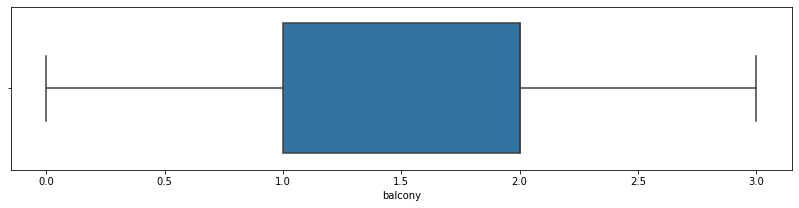

In [ ]:
# Create boxplot before replacing the missing values in the identified column(s).
import seaborn as sns
plt.figure(figsize=(14,3))
sns.boxplot(x='balcony',data=house_df)
plt.show()

In [ ]:
# Computing the modal value in the 'balcony' column.
house_df['balcony'].mode()

0    2.0
dtype: float64

**Q:** What should be the replacement value and why?

**A:** replacement value = 2 ; because it is the mode

Now, let's replace the missing values with the appropriate replacement value. But first, create a list of the row indices of the rows containing the missing values in the identified column(s).

In [ ]:
# Create a list of indices of the rows containing the missing values in the identified column(s).
list_balc = house_df[house_df['balcony'].isnull()== True ].index
list_balc

Int64Index([    6,     7,    34,    40,   146,   149,   153,   192,   258,
              381,
            ...
            13164, 13197, 13213, 13217, 13232, 13247, 13279, 13306, 13309,
            13316],
           dtype='int64', length=428)

In [ ]:
# Replace the missing values in the identified column(s) with the appropriate value.
house_df.loc[list_balc,'balcony']= 2

In [ ]:
# Display the first 5 rows of the DataFrame, after replacing the missing values in the identified column(s).
house_df.loc[list_balc,:].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,2.0,204.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.0
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,1925,3.0,2.0,125.0
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,1296,2.0,2.0,81.0
146,Super built-up Area,Ready To Move,Kothanur,3 BHK,1828,3.0,2.0,110.0


In [ ]:
# Check for missing values again.
house_df.isnull()== True

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False
13316,False,False,False,False,False,False,False,False
13317,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False


**Q:** Are there any more missing values in the DataFrame? Write yes or no. Also, write down the next steps that you will take to ensure that the replacement does not drastically affect the trend of values in the identified column(s).

**A:**  No, next step would be checking that the values of identified column is changed or not.

---

#### Next Steps

Take the necessary steps that you mentioned above in this section. Add new code cells to do the steps.

If there are no steps to be taken, then ignore this section and move forward.

**Q:** Do you see any drastic change in the trend of the values in the identified column(s)? Write either yes or no. Justify your answer as well.

**A:** yes they changed to 2

In [ ]:
# Convert the values in the 'bath' and 'balcony' columns to integer values.
house_df['balcony'] =house_df['balcony'].astype(int)
house_df['bath'] =house_df['bath'].astype(int)

#### 5.3 Convert Data-Types

Convert the values in the `bath` and `balcony` columns to integer values.

In [ ]:
# Print the data-types of the values in the 'bath' and 'balcony' columns.
print(house_df['bath'].dtype)
print(house_df['balcony'].dtype)

int64
int64


In [ ]:
# Display the first 5 rows of the DataFrame.
house_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2,1,51.00


---

---